# mam7_1850_NH3_emissions.ipynb

## Purpose
Create an ammonia emissions file for a MAM7 simulation using year-1850 aerosol emissions.

## Requirements
- Climate Data Operators (CDO).
- Python modules mentioned in cell #3, including [climapy](https://github.com/grandey/climapy) ([doi:10.5281/zenodo.1053020](https://doi.org/10.5281/zenodo.1053020)).
- *emis_NH3_2000_c111014.nc*, the default (year-2000) emissions file used by MAM7, located in */glade/p/cesmdata/cseg/inputdata/atm/cam/chem/trop_mozart_aero/emis/* on Cheyenne.
- *emissions-cmip6_NH3_anthro_surface_1850climo_0.9x1.25_c20170322.nc*, a year-1850 climatological (10-year average) anthropogenic emissions file, located in */glade/p/cesmdata/cseg/inputdata/atm/cam/chem/emis/CMIP6_emissions_1850climo/* on Cheyenne.

## Author
Benjamin S. Grandey, 2018

In [1]:
! date

Wed Jun  6 14:23:44 +08 2018


In [2]:
import climapy
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import os
import pandas as pd
import xarray as xr

# Print versions of packages
for module in [climapy, np, pd, xr]:
    try:
        print('{}.__version__ = {}'.format(module.__name__, module.__version__))
    except AttributeError:
        pass

%matplotlib inline
matplotlib.rcParams['figure.dpi'] = 60  # reduce resolution of inline figures to reduce notebook size

climapy.__version__ = 0.1.0+b35937c
numpy.__version__ = 1.14.3
pandas.__version__ = 0.23.0
xarray.__version__ = 0.10.4


In [3]:
# Input file locations on local machine
in_dir = os.path.expandvars('$HOME/data/projects/p17c_marc_comparison/misc')
y2000_nh3_fn = '{}/emis_NH3_2000_c111014.nc'.format(in_dir)
y1850_nh3_anth_1deg_fn = '{}/emissions-cmip6_NH3_anthro_surface_1850climo_0.9x1.25_c20170322.nc'.format(in_dir)

In [4]:
# Output directory
out_dir = os.path.expandvars('$HOME/data/projects/p17c_marc_comparison/input_data_p17c_mam7')

## Create year-1850 NH3 emissions file

In [5]:
# Conservatively remap year-1850 anthropogenic NH3 emissions to same grid as emis_NH3_2000_c111014.nc
y1850_nh3_anth_remapped_fn = '{}/temp_emissions-cmip6_NH3_anthro_surface_1850climo_1.9x2.5.nc'.format(out_dir)
print('Creating {}'.format(y1850_nh3_anth_remapped_fn))
! cdo remapcon,{y2000_nh3_fn} {y1850_nh3_anth_1deg_fn} {y1850_nh3_anth_remapped_fn}

Creating /Users/grandey/data/projects/p17c_marc_comparison/input_data_p17c_mam7/temp_emissions-cmip6_NH3_anthro_surface_1850climo_1.9x2.5.nc
cdo remapcon: SCRIP first order conservative weights from lonlat (288x192) to lonlat (144x96) grid
cdo remapcon:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 910cdo remapcon: Processed 663564 values from 2 variables over 12 timesteps ( 0.21s )


In [6]:
# Read remapped year-1850 anthropogenic NH3 emissions
y1850_nh3_anth_ds = xr.open_dataset(y1850_nh3_anth_remapped_fn)
y1850_nh3_anth_ds

<xarray.Dataset>
Dimensions:       (lat: 96, lon: 144, time: 12)
Coordinates:
  * time          (time) datetime64[ns] 1850-01-15T21:50:37.500000256 ...
  * lon           (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 ...
  * lat           (lat) float32 -90.0 -88.10526 -86.210526 -84.31579 ...
Data variables:
    date          (time) int32 ...
    emiss_anthro  (time, lat, lon) float32 ...
Attributes:
    CDI:                       Climate Data Interface version 1.9.1 (http://m...
    Conventions:               CF-1.6
    history:                   Wed Jun 06 14:23:45 2018: cdo remapcon,/Users/...
    data_title:                Anthropogenic emissions of NH3 for CMIP6
    molecular_weight:          17.0
    data_creator:              Jean-Francois Lamarque (lamar@ucar.edu) and Lo...
    data_summary:              Emissions from the Community Emission Data Sys...
    cesm_contact:              Louisa Emmons or Simone Tilmes
    creation_date:             20170322
    update_date:

In [7]:
# Read data from y2000_nh3_fn as a template for the year-1850 emissions
y1850_nh3_ds = xr.open_dataset(y2000_nh3_fn)
y1850_nh3_ds

<xarray.Dataset>
Dimensions:  (lat: 96, lon: 144, time: 12)
Coordinates:
  * lat      (lat) float32 -90.0 -88.10526 -86.210526 -84.31579 -82.42105 ...
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
  * time     (time) datetime64[ns] 1996-01-15 1996-02-15 1996-03-15 ...
Data variables:
    anthro   (time, lat, lon) float32 ...
    bb       (time, lat, lon) float32 ...
    biofuel  (time, lat, lon) float32 ...
    date     (time) int32 ...
    datesec  (time) int32 ...
    ocean    (time, lat, lon) float32 ...
    soil     (time, lat, lon) float32 ...
Attributes:
    title:                     Emissions of NH3
    author:                    L. Emmons, NCAR, 2006/01/02
    species:                   NH3
    history:                   Fri Oct 14 13:47:44 2011: ncks -d time,1560, e...
    nco_openmp_thread_number:  1
    NCO:                       4.0.5

In [8]:
# Update anthropogenic emissions using year-1850 climatological emissions for CMIP6
y1850_nh3_ds['anthro'].values = y1850_nh3_anth_ds['emiss_anthro'].values

In [9]:
# Set "biofuel" emissions to zero
y1850_nh3_ds['biofuel'].values[:] = 0

In [10]:
# Create copy of y2000_nh3_fn, to use as a template for saving the year-1850 emissions
y1850_nh3_fn = '{}/emis_NH3_1850_p17c.nc'.format(out_dir)
print('Creating {}'.format(y1850_nh3_fn))
! cp {y2000_nh3_fn} {y1850_nh3_fn}

Creating /Users/grandey/data/projects/p17c_marc_comparison/input_data_p17c_mam7/emis_NH3_1850_p17c.nc


In [11]:
# Save modifications to year-1850 file, using append mode
y1850_nh3_ds.to_netcdf(y1850_nh3_fn, mode='a')
print('Edited {}'.format(y1850_nh3_fn))

Edited /Users/grandey/data/projects/p17c_marc_comparison/input_data_p17c_mam7/emis_NH3_1850_p17c.nc


In [12]:
# Close open datasets
y1850_nh3_ds.close()
y1850_nh3_anth_ds.close()

In [13]:
# Delete temporary files
! rm -f {y1850_nh3_anth_remapped_fn}

## Check NH3 global emissions

In [14]:
# Load NH3 emissions data
y1850_nh3_ds = xr.open_dataset(y1850_nh3_fn)
y2000_nh3_ds = xr.open_dataset(y2000_nh3_fn)

In [15]:
# Calculate annual-total
units_sf = (17.03 / 6.022e23) * 1e4 * (365*24*60*60) # molecules/cm2/s -> g/m2/yr
y1850_nh3_annual = y1850_nh3_ds.mean(dim='time') * units_sf
y2000_nh3_annual = y2000_nh3_ds.mean(dim='time') * units_sf

In [16]:
# Calculate global-total in Tg/yr
y1850_nh3_global = climapy.xr_area_weighted_stat(y1850_nh3_annual, stat='sum') / 1e12
y2000_nh3_global = climapy.xr_area_weighted_stat(y2000_nh3_annual, stat='sum') / 1e12

In [17]:
# Print year-1850 NH3 emissions in Tg/yr
y1850_nh3_global.drop(['date', 'datesec'])

<xarray.Dataset>
Dimensions:  ()
Data variables:
    anthro   float64 6.022
    bb       float64 5.809
    biofuel  float64 0.0
    ocean    float64 8.171
    soil     float64 2.439

In [18]:
# Print year-2000 NH3 emissions in Tg/yr
y2000_nh3_global.drop(['date', 'datesec'])

<xarray.Dataset>
Dimensions:  ()
Data variables:
    anthro   float64 37.36
    bb       float64 5.809
    biofuel  float64 2.153
    ocean    float64 8.171
    soil     float64 2.439

In [19]:
# Convert to Series
sectors = ['anthro', 'bb', 'biofuel', 'ocean', 'soil']
y1850_nh3_global_series = pd.Series({k: float(v) for k, v in dict(y1850_nh3_global[sectors]).items()},
                                    name='Year-1850')
y2000_nh3_global_series = pd.Series({k: float(v) for k, v in dict(y2000_nh3_global[sectors]).items()},
                                    name='Year-2000')

/Users/grandey/anaconda/lib/python3.6/_collections_abc.py:720: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  yield from self._mapping


In [20]:
# Put data in DataFrame
nh3_global_df = pd.DataFrame(columns=sectors)
nh3_global_df = nh3_global_df.append(y1850_nh3_global_series)
nh3_global_df = nh3_global_df.append(y2000_nh3_global_series)
nh3_global_df

,anthro,bb,biofuel,ocean,soil
Year-1850,6.022319,5.809238,0.000000,8.170621,2.43938
Year-2000,37.357517,5.809238,2.153098,8.170621,2.43938


In [21]:
# Calculate sum across sectors
nh3_global_df['TOTAL'] = nh3_global_df.sum(axis=1)
nh3_global_df

,anthro,bb,biofuel,ocean,soil,TOTAL
Year-1850,6.022319,5.809238,0.000000,8.170621,2.43938,22.441558
Year-2000,37.357517,5.809238,2.153098,8.170621,2.43938,55.929855


Comparing the "anthro" values with Fig. 2 of [Hoesly et al. (2018)](https://www.geosci-model-dev.net/11/369/2018/gmd-11-369-2018.pdf), these values look reasonable.

## Check regional distribution

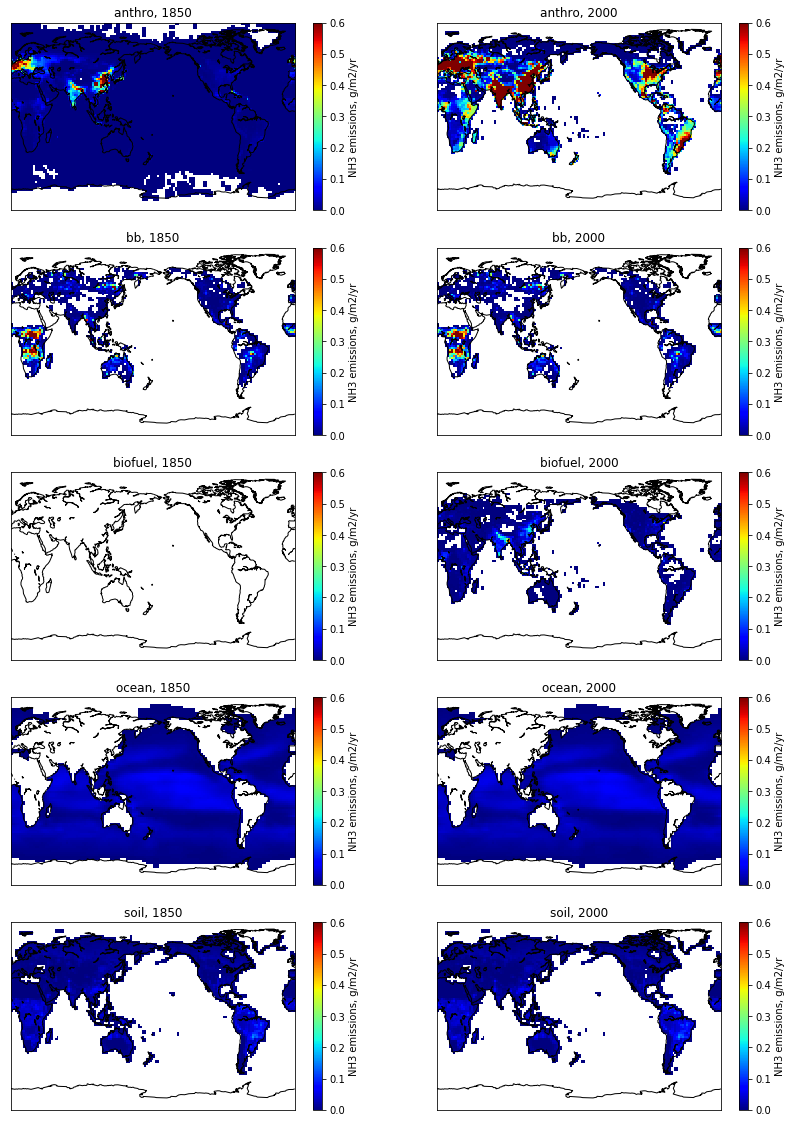

In [22]:
fig, axs = plt.subplots(5, 2, figsize=(14, 20))  # set up figure
for sector, row in zip(sectors, range(5)):  # loop over sectors (rows)
    for year, ds, col in zip(['1850', '2000'],
                             [y1850_nh3_annual, y2000_nh3_annual],
                             range(2)):  # loop over 1850 and 2000 (columns)
        ax = axs[row, col]
        # Longitude and latitude, and lower bounds
        lon = ds['lon']
        lat = ds['lat']
        lon0 = (lon[0] - (lon[1]-lon[0])/2.0).values
        lat0 = (lat[0] - (lat[1]-lat[0])/2.0).values
        # Map
        bm = Basemap(llcrnrlat=-90.0, urcrnrlat=90.0,
                     llcrnrlon=lon0, urcrnrlon=360.0+lon0, ax=ax)
        bm.drawcoastlines(ax=ax)
        # Plot field
#        data_masked = np.ma.masked_less(ds[sector].values, 1e-6)  # mask very small
        data_masked = np.ma.masked_equal(ds[sector].values, 0)  # mask zero
        im = ax.imshow(data_masked,
                       extent=[lon0, 360+lon0, -lat0, lat0],
                       vmin=0, vmax=0.6, cmap='jet',
                       aspect='auto')
        plt.colorbar(im, ax=ax, label='NH3 emissions, g/m2/yr')
        # Title
        ax.set_title('{}, {}'.format(sector, year))

The spatial distributions look reasonable. Over ocean, the year-1850 "anthro" emissions are often non-zero but are very small (< 1e-6 g/m2/yr).

In [23]:
# Close open datasets
y1850_nh3_ds.close()
y2000_nh3_ds.close()

In [24]:
! date

Wed Jun  6 14:23:52 +08 2018
